In [115]:
# %run plot_utils.ipynb
exec(open("plot_utils.py").read())

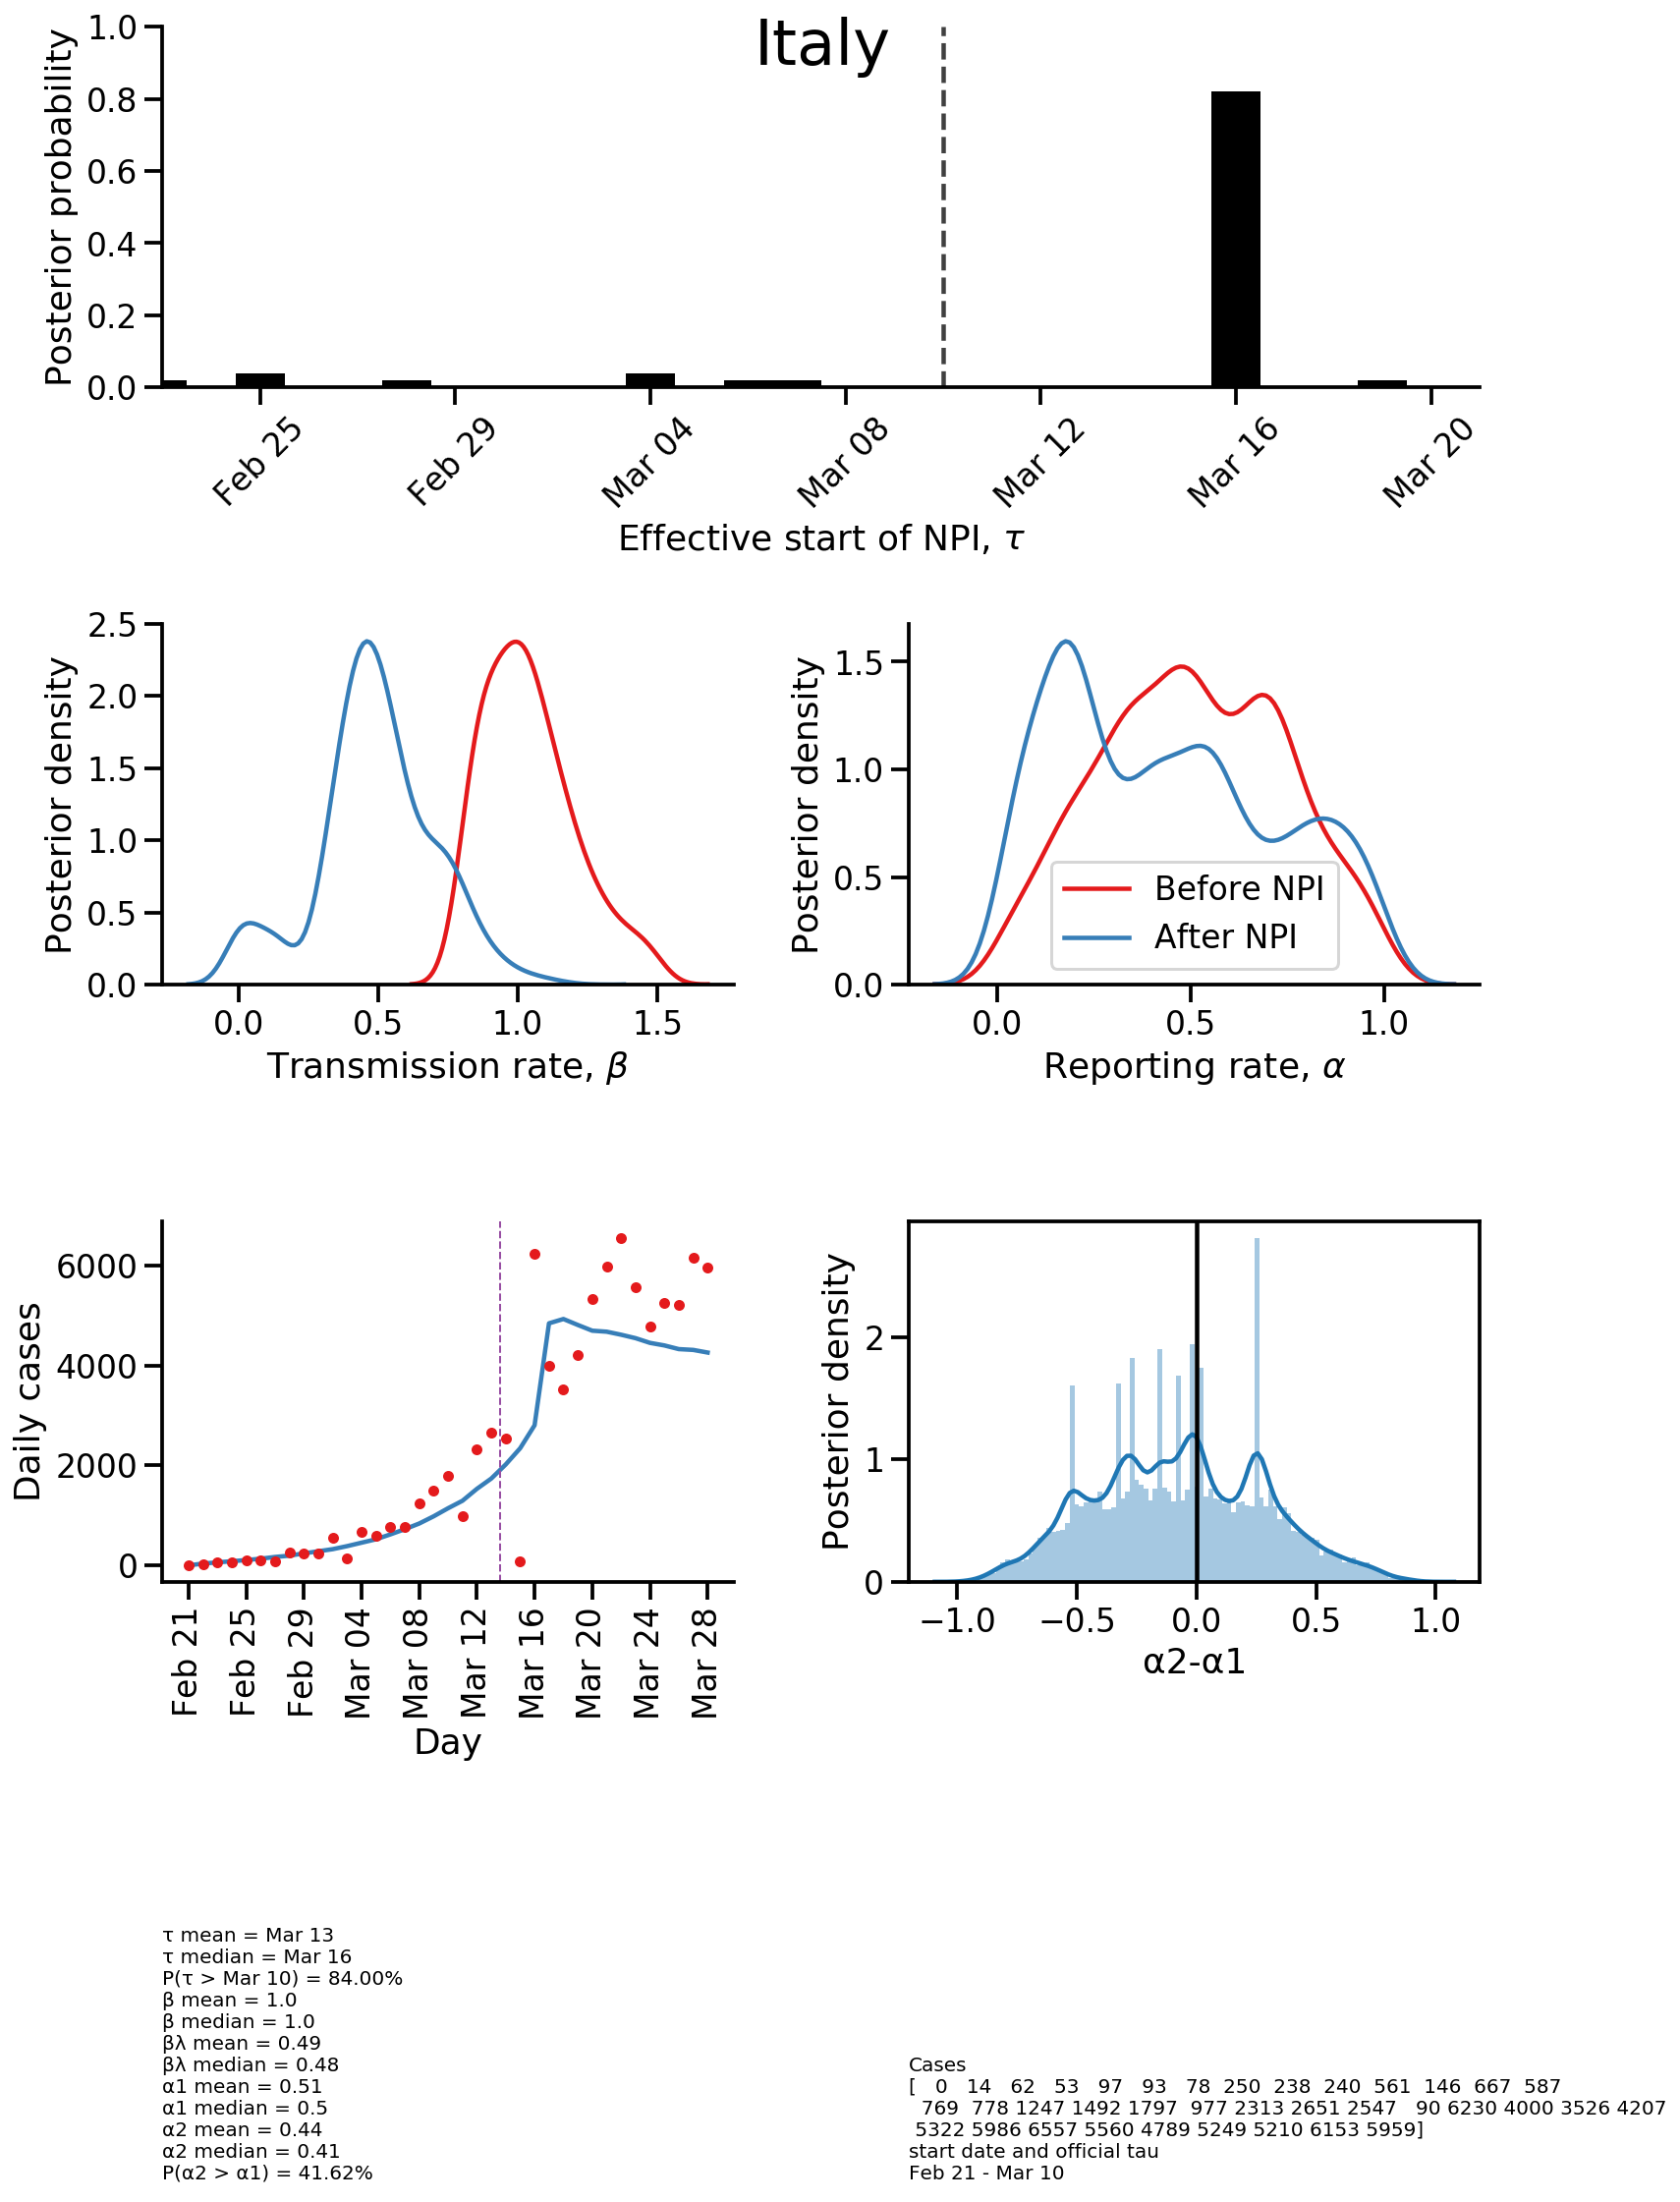

In [118]:
country_name = 'Italy'
file_name = '../output/25-Apr_03-ysum-and-initdate-fixes/inference/{}.npz'.format(country_name)
load_data(file_name)
plot_all();
